In [29]:
#import libraries
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [30]:
#sympy solution
from sympy.utilities.lambdify import lambdify

init_printing()

x=sympy.symbols('x')
y=sympy.cos(x)**2*sympy.sin(x)**3/(4*x**5*sympy.exp(x))

yprime=sympy.diff(y)
yprime

yprime_lamb = lambdify((x), yprime)
yprime_lamb(2.2)

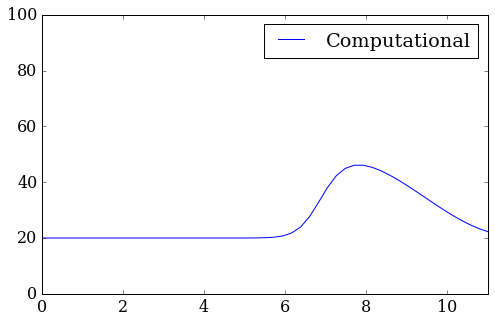

In [31]:
#Traffic equation solution

#Every units are km and hours
Vmax = 136
L = 11
pmax = 250
nx = 51
dt = 0.001
T=0.05
nt=int(T/dt)
dx=L/nx


#initial conditions

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 ##note this change
rho0[10:20] = 50


u=rho0.copy()

#solve numerically the equation
for n in range (nt):
    un= u.copy()
    u[1:]=un[1:]- dt/dx*Vmax*(1- 2*un[1:]/pmax)*(un[1:]-un[0:-1])
    u[0] = 20
        
#show solution because we like graphes
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, label='Computational')
pyplot.xlim([0,11])
pyplot.ylim([0,100])
pyplot.legend();



#numerical information for homework
#finding the biggest rho and where it is
roh_mx = u[0]
th_mx = 0
for i in range (0, len(u)-1):
    if roh_mx<u[i]:
        roh_mx = u[i]
        th_mx = dx*i

#V is a min when roh is a max
V_min = Vmax*(1-roh_mx/pmax)/3.6
V_min

#finding average speed
tempsum = 0
for i in range(0, len(u)-1):
    tempsum = tempsum + Vmax*(1-u[i]/pmax)/3.6
V_av = tempsum/(len(u)-1)

In [32]:
V_av 
